In [80]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from dython import nominal

In [97]:
clean_dat = pd.read_csv("cleaned_data.csv")
clean_dat = clean_dat.iloc[:, 1:]
clean_dat.head()
#Using Numerical Data first
HorseP = pd.DataFrame(clean_dat["HorsePower"])
Cylinder = pd.DataFrame(clean_dat["Cylinders"])
Price = pd.DataFrame(clean_dat["Price"])
NumAll = pd.DataFrame(clean_dat[["HorsePower", "Cylinders", "Price"]])
Array = [HorseP, Cylinder, Price]
clean_dat.head()

,Manufacturer,Model,HorsePower,Cylinders,Category,Price
0,BMW,1 Series M,335.0,6.0,"Factory Tuner,Luxury,High-Performance",46135
1,BMW,1 Series,300.0,6.0,"Luxury,Performance",40650
2,BMW,1 Series,300.0,6.0,"Luxury,High-Performance",36350
3,BMW,1 Series,230.0,6.0,"Luxury,Performance",29450
4,BMW,1 Series,230.0,6.0,Luxury,34500


<AxesSubplot:>

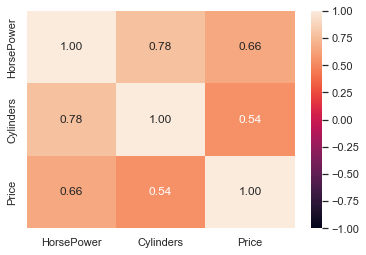

In [87]:
#Initial Correlation
sb.heatmap(NumAll.corr(),vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

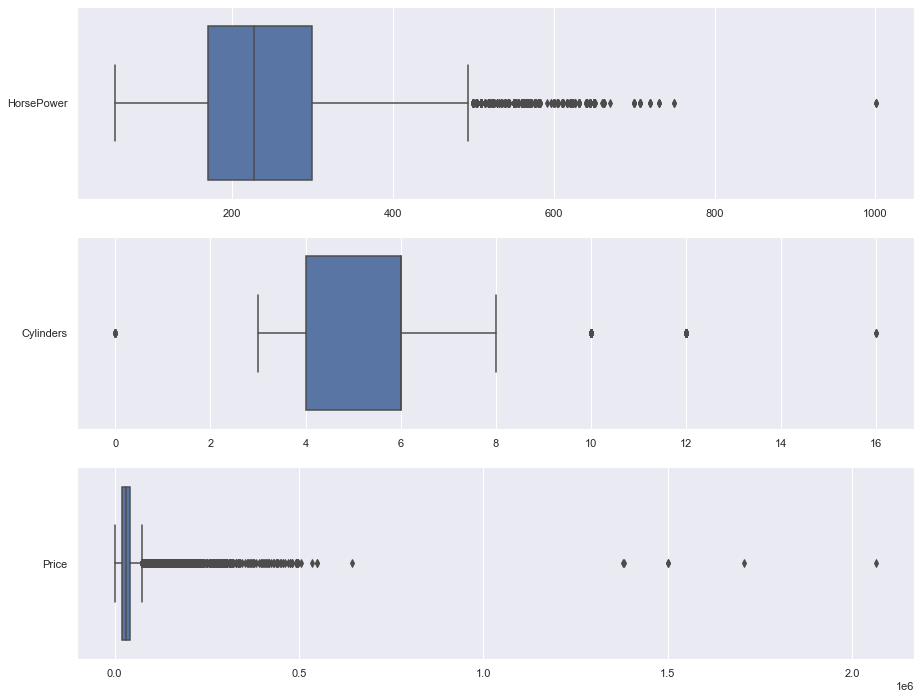

In [88]:
fig, axes = plt.subplots(3, 1, figsize = (15,12))
sb.boxplot(ax = axes[0], data = HorseP, orient = 'h')
sb.boxplot(ax = axes[1], data = Cylinder, orient = 'h')
sb.boxplot(ax = axes[2], data = Price, orient = 'h')

Removing any or all outliers improved correlation between horsepower and price and decreases correlation between cylinders and price.

No outliers removed


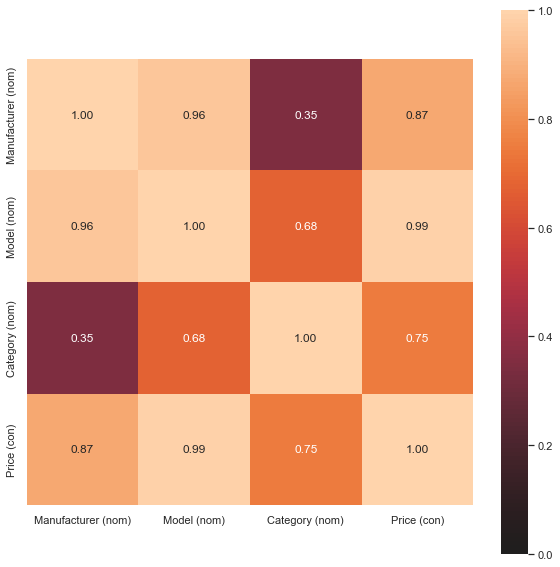

HP Outlier removed


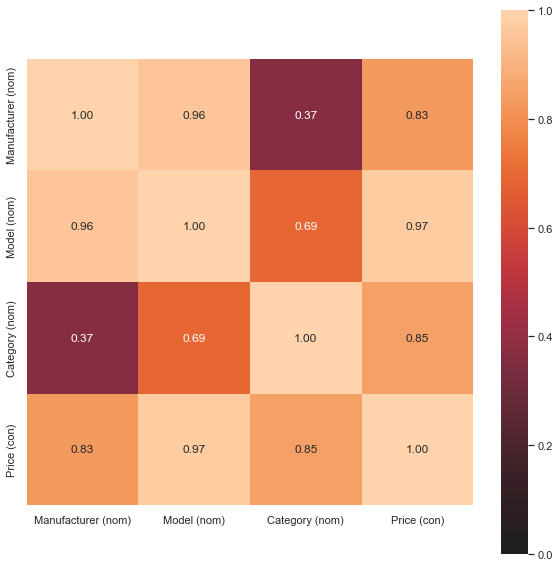

Cylinder outlier removed


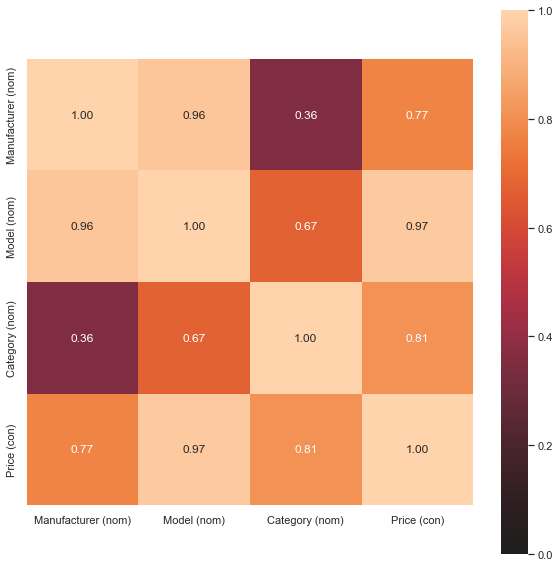

Price outlier removed


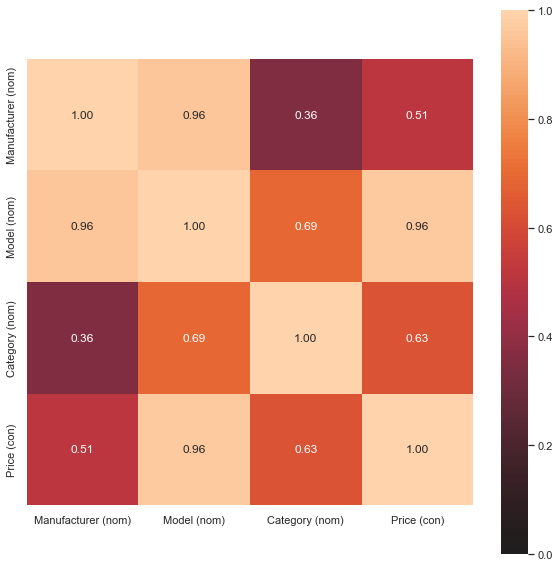

{'corr':                     Manufacturer (nom)  Model (nom)  Category (nom)  \
 Manufacturer (nom)            1.000000     0.959153        0.356018   
 Model (nom)                   0.959153     1.000000        0.694539   
 Category (nom)                0.356018     0.694539        1.000000   
 Price (con)                   0.512117     0.962117        0.630269   
 
                     Price (con)  
 Manufacturer (nom)     0.512117  
 Model (nom)            0.962117  
 Category (nom)         0.630269  
 Price (con)            1.000000  ,
 'ax': <AxesSubplot:>}

In [108]:
print("No outliers removed")
CatAll = pd.DataFrame(clean_dat[['Manufacturer', 'Model', 'Category', 'Price']])
nominal.associations(CatAll, mark_columns = True, figsize = (10,10))

print("HP Outlier removed")
q1 = HorseP.quantile(0.25)
q3 = HorseP.quantile(0.75)
iqr = q3 - q1
upp = q3 + (1.5*iqr)
low = q1 - (1.5*iqr)
outlier = (HorseP < low) | (HorseP > upp)
no_out = clean_dat[~(outlier.any(axis = 1))]
CatAll = pd.DataFrame(no_out[['Manufacturer', 'Model', 'Category', 'Price']])
nominal.associations(CatAll, mark_columns = True, figsize = (10,10))

print("Cylinder outlier removed")
q1 = Cylinder.quantile(0.25)
q3 = Cylinder.quantile(0.75)
iqr = q3 - q1
upp = q3 + (1.5*iqr)
low = q1 - (1.5*iqr)
outlier = (Cylinder < low) | (Cylinder > upp)
no_out = clean_dat[~(outlier.any(axis = 1))]
CatAll = pd.DataFrame(no_out[['Manufacturer', 'Model', 'Category', 'Price']])
nominal.associations(CatAll, mark_columns = True, figsize = (10,10))

print("Price outlier removed")
q1 = Price.quantile(0.25)
q3 = Price.quantile(0.75)
iqr = q3 - q1
upp = q3 + (1.5*iqr)
low = q1 - (1.5*iqr)
outlier = (Price < low) | (Price > upp)
no_out = clean_dat[~(outlier.any(axis = 1))]
CatAll = pd.DataFrame(no_out[['Manufacturer', 'Model', 'Category', 'Price']])
nominal.associations(CatAll, mark_columns = True, figsize = (10,10))



Could choose Horsepower + Manufacturer and Model as predictors. Category section not sure how to deal with, cause cars fit into multiple categories at once.

Tried removing outliers from numerical data to check if it improved correlation in categorical data while improving HP correlation. Removing any outlier decreased correlation between Make+Model and price. 